In [1]:
#####################################################################################################################
#Developed by Jonathan Ojeda 18/2/2021 QAAFI UQ
# Code functionalities:
# Define the cluster number to be used by k-means 
#####################################################################################################################

In [20]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#Extend screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
data0 = pd.read_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\data\KMEANS.csv')
data = data0.drop(['biomass'], axis=1)
data.head()

lat    lon   rad40DAS   rad80DAS    radHarv  rain40DAS  rain80DAS  \
0  25.25 -81.25  940.74180  892.22955  794.80120  235.73260  204.89590   
1  25.25 -80.75  851.10455  830.80730  738.55225  284.26498  210.99913   
2  25.75 -81.75  962.60050  895.56790  799.57650  245.17867  240.11680   
3  25.75 -81.25  923.27690  865.23720  774.14056  304.17690  261.68222   
4  25.75 -80.75  824.78644  796.61610  711.15344  321.43274  259.58026   

    rainHarv  temp40DAS  temp80DAS   tempHarv  
0  252.14170  28.254566  29.002132  28.768867  
1  283.33490  27.710733  28.523867  28.350399  
2  273.92220  28.151400  28.857300  28.719933  
3  293.34668  27.578701  28.500334  28.430400  
4  295.16614  27.422867  28.527866  28.438868

In [4]:
categorical_features = ['lat', 'lon']
continuous_features = ['rad40DAS', 'rad80DAS', 'radHarv', 'rain40DAS',
       'rain80DAS', 'rainHarv', 'temp40DAS', 'temp80DAS', 'tempHarv']

In [5]:
data[continuous_features].describe()

rad40DAS     rad80DAS      radHarv    rain40DAS    rain80DAS  \
count  1860.000000  1860.000000  1860.000000  1860.000000  1860.000000   
mean    871.275327   855.090513   706.785979   137.510137   128.123306   
std      54.039596    71.705688    92.051247    34.588368    39.452027   
min     770.751500   712.939760   501.032530    13.173759    33.294500   
25%     836.865787   800.503875   639.394145   122.650075   104.991875   
50%     856.344200   851.443920   691.129200   139.840585   125.122100   
75%     887.899105   894.367062   749.285525   154.554397   141.424585   
max    1055.759200  1067.551500   931.341060   321.432740   280.612270   

          rainHarv    temp40DAS    temp80DAS     tempHarv  
count  1860.000000  1860.000000  1860.000000  1860.000000  
mean    112.507129    22.422573    24.876729    22.915632  
std      37.948758     3.231240     2.927086     3.957218  
min      37.174446    12.091166    16.550200    13.500675  
25%      94.802638    19.870825    22.660991    20.032608  
50%     112.934170    23.063951    25.423284    22.291683  
75%     127.194359    24.867025    27.342883    26.531984  
max     295.166140    28.884237    30.978643    31.728085

In [6]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

rad40DAS   rad80DAS    radHarv  rain40DAS  rain80DAS   rainHarv  \
0  940.74180  892.22955  794.80120  235.73260  204.89590  252.14170   
1  851.10455  830.80730  738.55225  284.26498  210.99913  283.33490   
2  962.60050  895.56790  799.57650  245.17867  240.11680  273.92220   
3  923.27690  865.23720  774.14056  304.17690  261.68222  293.34668   
4  824.78644  796.61610  711.15344  321.43274  259.58026  295.16614   

   temp40DAS  temp80DAS   tempHarv  lat_25.25  ...  lon_-76.75  lon_-76.25  \
0  28.254566  29.002132  28.768867          1  ...           0           0   
1  27.710733  28.523867  28.350399          1  ...           0           0   
2  28.151400  28.857300  28.719933          0  ...           0           0   
3  27.578701  28.500334  28.430400          0  ...           0           0   
4  27.422867  28.527866  28.438868          0  ...           0           0   

   lon_-75.75  lon_-75.25  lon_-74.75  lon_-74.25  lon_-73.75  lon_-73.25  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   lon_-72.75  lon_-72.25  
0           0           0  
1           0           0  
2           0           0  
3           0           0  
4           0           0  

[5 rows x 128 columns]

In [7]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [8]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

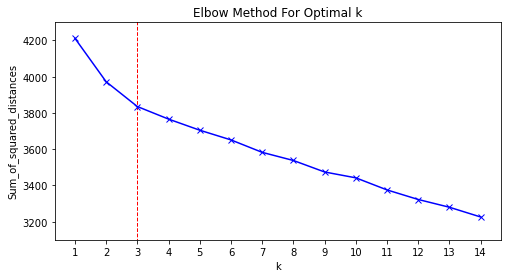

In [22]:
fig = plt.figure(figsize=(8,4))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
ax = plt.gca()
ax.set_ylim([3100,4300])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.plot([3,3],[3000,4400],"--",color="red", linewidth=1,zorder=1)
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\kmeans.png', dpi=300,bbox_inches='tight')